2장에 나왔던 이미지 분류 문제(자유 주제)를 fastAi 라이브러리를 이용해서 각자 구현해서 업로드 해주세요.

4장의 MNIST 숫자 분류 문제를 10개(3과 7 두 종류 분류가 아니라) 숫자로 확대해서 직접 구현해서 업로드 해주세요.
(p.246 4.9.1 추가 연구 2번 문제입니다.)

-책에 나와 있는 내용을 이해하면서 확장해 보길 바랍니다.

-본인 직접해보지 않고 설명 듣고 눈으로 보는 것만으로는 발전에 한계가 있습니다.

-가능하다면, 다음 미팅(12/7(수)) 때에 경험담을 공유해 봅시다.

In [1]:
from fastai.vision.all import *
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = untar_data(URLs.MNIST)

In [3]:
path.ls()

(#2) [Path('C:/Users/csh70/.fastai/data/mnist_png/testing'),Path('C:/Users/csh70/.fastai/data/mnist_png/training')]

In [4]:
(path/'training').ls()

(#10) [Path('C:/Users/csh70/.fastai/data/mnist_png/training/0'),Path('C:/Users/csh70/.fastai/data/mnist_png/training/1'),Path('C:/Users/csh70/.fastai/data/mnist_png/training/2'),Path('C:/Users/csh70/.fastai/data/mnist_png/training/3'),Path('C:/Users/csh70/.fastai/data/mnist_png/training/4'),Path('C:/Users/csh70/.fastai/data/mnist_png/training/5'),Path('C:/Users/csh70/.fastai/data/mnist_png/training/6'),Path('C:/Users/csh70/.fastai/data/mnist_png/training/7'),Path('C:/Users/csh70/.fastai/data/mnist_png/training/8'),Path('C:/Users/csh70/.fastai/data/mnist_png/training/9')]

In [5]:
ones = (path/'training'/'1').ls().sorted()
twos = (path/'training'/'2').ls().sorted()
threes = (path/'training'/'3').ls().sorted()
fours = (path/'training'/'4').ls().sorted()
fives = (path/'training'/'5').ls().sorted()
sixs = (path/'training'/'6').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
eights = (path/'training'/'8').ls().sorted()
nines = (path/'training'/'9').ls().sorted()

In [6]:
im1 = Image.open(ones[1])
im2 = Image.open(twos[1])
im3 = Image.open(threes[1])
im4 = Image.open(fours[1])
im5 = Image.open(fives[1])
im6 = Image.open(sixs[1])
im7 = Image.open(sevens[1])
im8 = Image.open(eights[1])
im9 = Image.open(nines[1])

In [7]:
img = [im1,im2,im3,im4,im5,im6,im7,im8,im9]

<function matplotlib.pyplot.show(close=None, block=None)>

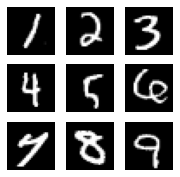

In [8]:
plt.figure(figsize=(3,3))
for index in range(9):
    plt.subplot(3,3,index+1)
    plt.imshow(img[index], cmap='gray')
    plt.axis('off')
    
plt.show

In [9]:
array(im1)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  13, 212, 253,  56,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  24, 252, 252, 139,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
tensor(im1)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,  13, 212, 253,  56,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,  24, 252, 252, 139,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [11]:
im1_t = tensor(im1)
df = pd.DataFrame(im1_t[2:25,7:21])
df.style.set_properties(**{'front-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,13,212,253,56,0
3,0,0,0,0,0,0,0,0,0,24,252,252,139,0
4,0,0,0,0,0,0,0,0,0,108,252,252,45,0
5,0,0,0,0,0,0,0,0,0,233,252,195,9,0
6,0,0,0,0,0,0,0,0,53,253,252,79,0,0
7,0,0,0,0,0,0,0,0,116,255,253,69,0,0
8,0,0,0,0,0,0,0,0,116,253,223,25,0,0
9,0,0,0,0,0,0,0,0,199,253,174,0,0,0


In [12]:
one_tensors = [tensor(Image.open(o)) for o in ones]
two_tensors = [tensor(Image.open(o)) for o in twos]
three_tensors = [tensor(Image.open(o)) for o in threes]
four_tensors = [tensor(Image.open(o)) for o in fours]
five_tensors = [tensor(Image.open(o)) for o in fives]
six_tensors = [tensor(Image.open(o)) for o in sixs]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
eight_tensors = [tensor(Image.open(o)) for o in eights]
nine_tensors = [tensor(Image.open(o)) for o in nines]

<AxesSubplot:>

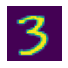

In [13]:
show_image(three_tensors[1])

In [14]:
stacked_ones = torch.stack(one_tensors).float()/255
stacked_twos = torch.stack(two_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_fours = torch.stack(four_tensors).float()/255
stacked_fives = torch.stack(five_tensors).float()/255
stacked_sixs = torch.stack(six_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_eights = torch.stack(eight_tensors).float()/255
stacked_nines = torch.stack(nine_tensors).float()/255

In [15]:
len(stacked_ones.shape)

3

In [16]:
stacked_ones.ndim

3

In [17]:
mean1 = stacked_ones.mean(0)
mean2 = stacked_twos.mean(0)
mean3 = stacked_threes.mean(0)
mean4 = stacked_fours.mean(0)
mean5 = stacked_fives.mean(0)
mean6 = stacked_sixs.mean(0)
mean7 = stacked_sevens.mean(0)
mean8 = stacked_eights.mean(0)
mean9 = stacked_nines.mean(0)

In [18]:
mean_array = [mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9]

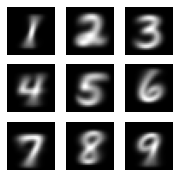

In [19]:
plt.figure(figsize=(3,3))

for index in range(9):
    plt.subplot(3, 3, index +1)
    plt.imshow(mean_array[index], cmap='gray')
    plt.axis('off')
plt.show()
     

In [20]:
a_1 = stacked_ones[1]
a_2 = stacked_twos[1]
a_3 = stacked_threes[1]
a_4 = stacked_fours[1]
a_5 = stacked_fives[1]
a_6 = stacked_sixs[1]
a_7 = stacked_sevens[1]
a_8 = stacked_eights[1]
a_9 = stacked_nines[1]
a_array = [a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9]

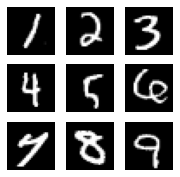

In [21]:
plt.figure(figsize=(3,3))

for index in range(9):
    plt.subplot(3, 3, index +1)
    plt.imshow(a_array[index], cmap='gray')
    plt.axis('off')
plt.show()
     

In [22]:
F.mse_loss(a_3,mean7).sqrt()

tensor(0.3021)

In [23]:
valid_1_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'1').ls()])
valid_2_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'2').ls()])
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'3').ls()])
valid_4_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'4').ls()])
valid_5_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'5').ls()])
valid_6_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'6').ls()])
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'7').ls()])
valid_8_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'8').ls()])
valid_9_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'9').ls()])

In [24]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3,mean3)

tensor(0.1114)

In [25]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([25.6367, 44.4859, 41.5864,  ..., 27.7280, 41.1506, 43.8371]),
 torch.Size([1010]))

In [66]:
def is_1(x):
    tmp = (mnist_distance(x,mean1) < mnist_distance(x,mean2)).float().mean()
    tmp += (mnist_distance(x,mean1) < mnist_distance(x,mean3)).float().mean()
    tmp += (mnist_distance(x,mean1) < mnist_distance(x,mean4)).float().mean()
    tmp += (mnist_distance(x,mean1) < mnist_distance(x,mean5)).float().mean()
    tmp += (mnist_distance(x,mean1) < mnist_distance(x,mean6)).float().mean()
    tmp += (mnist_distance(x,mean1) < mnist_distance(x,mean7)).float().mean()
    tmp += (mnist_distance(x,mean1) < mnist_distance(x,mean8)).float().mean()
    tmp += (mnist_distance(x,mean1) < mnist_distance(x,mean9)).float().mean()
    return tmp / 8

def is_2(x):
    tmp = (mnist_distance(x,mean2) < mnist_distance(x,mean1)).float().mean()
    tmp += (mnist_distance(x,mean2) < mnist_distance(x,mean3)).float().mean()
    tmp += (mnist_distance(x,mean2) < mnist_distance(x,mean4)).float().mean()
    tmp += (mnist_distance(x,mean2) < mnist_distance(x,mean5)).float().mean()
    tmp += (mnist_distance(x,mean2) < mnist_distance(x,mean6)).float().mean()
    tmp += (mnist_distance(x,mean2) < mnist_distance(x,mean7)).float().mean()
    tmp += (mnist_distance(x,mean2) < mnist_distance(x,mean8)).float().mean()
    tmp += (mnist_distance(x,mean2) < mnist_distance(x,mean9)).float().mean()
    return tmp / 8

def is_3(x):
    tmp = (mnist_distance(x,mean3) < mnist_distance(x,mean1)).float().mean()
    tmp += (mnist_distance(x,mean3) < mnist_distance(x,mean2)).float().mean()
    tmp += (mnist_distance(x,mean3) < mnist_distance(x,mean4)).float().mean()
    tmp += (mnist_distance(x,mean3) < mnist_distance(x,mean5)).float().mean()
    tmp += (mnist_distance(x,mean3) < mnist_distance(x,mean6)).float().mean()
    tmp += (mnist_distance(x,mean3) < mnist_distance(x,mean7)).float().mean()
    tmp += (mnist_distance(x,mean3) < mnist_distance(x,mean8)).float().mean()
    tmp += (mnist_distance(x,mean3) < mnist_distance(x,mean9)).float().mean()
    return tmp / 8

def is_4(x):
    tmp = (mnist_distance(x,mean4) < mnist_distance(x,mean1)).float().mean()
    tmp += (mnist_distance(x,mean4) < mnist_distance(x,mean2)).float().mean()
    tmp += (mnist_distance(x,mean4) < mnist_distance(x,mean3)).float().mean()
    tmp += (mnist_distance(x,mean4) < mnist_distance(x,mean5)).float().mean()
    tmp += (mnist_distance(x,mean4) < mnist_distance(x,mean6)).float().mean()
    tmp += (mnist_distance(x,mean4) < mnist_distance(x,mean7)).float().mean()
    tmp += (mnist_distance(x,mean4) < mnist_distance(x,mean8)).float().mean()
    tmp += (mnist_distance(x,mean4) < mnist_distance(x,mean9)).float().mean()
    return tmp / 8

def is_5(x):
    tmp = (mnist_distance(x,mean5) < mnist_distance(x,mean1)).float().mean()
    tmp += (mnist_distance(x,mean5) < mnist_distance(x,mean2)).float().mean()
    tmp += (mnist_distance(x,mean5) < mnist_distance(x,mean3)).float().mean()
    tmp += (mnist_distance(x,mean5) < mnist_distance(x,mean4)).float().mean()
    tmp += (mnist_distance(x,mean5) < mnist_distance(x,mean6)).float().mean()
    tmp += (mnist_distance(x,mean5) < mnist_distance(x,mean7)).float().mean()
    tmp += (mnist_distance(x,mean5) < mnist_distance(x,mean8)).float().mean()
    tmp += (mnist_distance(x,mean5) < mnist_distance(x,mean9)).float().mean()
    return tmp / 8

def is_6(x):
    tmp = (mnist_distance(x,mean6) < mnist_distance(x,mean1)).float().mean()
    tmp += (mnist_distance(x,mean6) < mnist_distance(x,mean2)).float().mean()
    tmp += (mnist_distance(x,mean6) < mnist_distance(x,mean3)).float().mean()
    tmp += (mnist_distance(x,mean6) < mnist_distance(x,mean4)).float().mean()
    tmp += (mnist_distance(x,mean6) < mnist_distance(x,mean5)).float().mean()
    tmp += (mnist_distance(x,mean6) < mnist_distance(x,mean7)).float().mean()
    tmp += (mnist_distance(x,mean6) < mnist_distance(x,mean8)).float().mean()
    tmp += (mnist_distance(x,mean6) < mnist_distance(x,mean9)).float().mean()
    return tmp / 8

def is_7(x):
    tmp = (mnist_distance(x,mean7) < mnist_distance(x,mean1)).float().mean()
    tmp += (mnist_distance(x,mean7) < mnist_distance(x,mean2)).float().mean()
    tmp += (mnist_distance(x,mean7) < mnist_distance(x,mean3)).float().mean()
    tmp += (mnist_distance(x,mean7) < mnist_distance(x,mean4)).float().mean()
    tmp += (mnist_distance(x,mean7) < mnist_distance(x,mean5)).float().mean()
    tmp += (mnist_distance(x,mean7) < mnist_distance(x,mean6)).float().mean()
    tmp += (mnist_distance(x,mean7) < mnist_distance(x,mean8)).float().mean()
    tmp += (mnist_distance(x,mean7) < mnist_distance(x,mean9)).float().mean()
    return tmp / 8
  
def is_8(x):
    tmp = (mnist_distance(x,mean8) < mnist_distance(x,mean1)).float().mean()
    tmp += (mnist_distance(x,mean8) < mnist_distance(x,mean2)).float().mean()
    tmp += (mnist_distance(x,mean8) < mnist_distance(x,mean3)).float().mean()
    tmp += (mnist_distance(x,mean8) < mnist_distance(x,mean4)).float().mean()
    tmp += (mnist_distance(x,mean8) < mnist_distance(x,mean5)).float().mean()
    tmp += (mnist_distance(x,mean8) < mnist_distance(x,mean6)).float().mean()
    tmp += (mnist_distance(x,mean8) < mnist_distance(x,mean7)).float().mean()
    tmp += (mnist_distance(x,mean8) < mnist_distance(x,mean9)).float().mean()
    return tmp / 8

def is_9(x):
    tmp = (mnist_distance(x,mean9) < mnist_distance(x,mean1)).float().mean()
    tmp += (mnist_distance(x,mean9) < mnist_distance(x,mean2)).float().mean()
    tmp += (mnist_distance(x,mean9) < mnist_distance(x,mean3)).float().mean()
    tmp += (mnist_distance(x,mean9) < mnist_distance(x,mean4)).float().mean()
    tmp += (mnist_distance(x,mean9) < mnist_distance(x,mean5)).float().mean()
    tmp += (mnist_distance(x,mean9) < mnist_distance(x,mean6)).float().mean()
    tmp += (mnist_distance(x,mean9) < mnist_distance(x,mean7)).float().mean()
    tmp += (mnist_distance(x,mean9) < mnist_distance(x,mean8)).float().mean()
    return tmp / 8

In [59]:
is_1(a_1).float().mean()

tensor(8.)

In [60]:
is_1(valid_3_tens)

tensor(5.4624)

In [55]:
accuracy_3s = is_1(valid_3_tens).float().mean()
accuracy_3s

tensor(0.8109)

In [70]:
accuracy = (is_1(valid_1_tens) + is_2(valid_2_tens) + is_3(valid_3_tens) + is_4(valid_4_tens) + is_5(valid_5_tens) + is_6(valid_6_tens) + is_7(valid_7_tens) + is_8(valid_8_tens) + is_9(valid_9_tens))/9
accuracy

tensor(0.9262)